<a href="https://colab.research.google.com/github/petrusthelastking/2341720227_ML_2025/blob/main/TUGAS_Kelompok_5_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bagian Baru**

In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

**Import Data**

In [ ]:
# Download latest version
path = kagglehub.dataset_download("imtkaggleteam/top-100-cryptocurrency-2020-2025")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'top-100-cryptocurrency-2020-2025' dataset.
Path to dataset files: /kaggle/input/top-100-cryptocurrency-2020-2025


**Menampilkan Data**

In [ ]:
# Use the path from the previous cell's output and the correct file name
df = pd.read_csv(f'{path}/top_100_cryptos_with_correct_network.csv')
display(df.head(200000))

,symbol,date,open,high,low,close,network
0,BTCUSDT,2018-08-01,7735.670,7750.000,7430.000,7604.580,Bitcoin
1,BTCUSDT,2018-08-02,7600.080,7709.460,7455.720,7525.710,Bitcoin
2,BTCUSDT,2018-08-03,7525.710,7540.000,7282.440,7418.780,Bitcoin
3,BTCUSDT,2018-08-04,7412.270,7494.810,6926.000,7009.840,Bitcoin
4,BTCUSDT,2018-08-05,7009.840,7089.870,6882.290,7024.190,Bitcoin
...,...,...,...,...,...,...,...
199995,SUSHIUSDT,2023-02-12,1.312,1.324,1.241,1.267,Ethereum
199996,SUSHIUSDT,2023-02-13,1.267,1.287,1.205,1.284,Ethereum
199997,SUSHIUSDT,2023-02-14,1.283,1.326,1.244,1.308,Ethereum
199998,SUSHIUSDT,2023-02-15,1.308,1.420,1.283,1.418,Ethereum


**Ringkasan Statistik Data Numerik**

In [ ]:
df.describe()

,open,high,low,close
count,211679.000000,211679.000000,211679.000000,211679.000000
mean,628.566155,646.550242,609.654246,629.092910
std,5345.009524,5478.052232,5207.376818,5350.691462
min,0.000043,0.000044,0.000037,0.000043
25%,0.061740,0.064500,0.059095,0.061750
50%,0.418100,0.438400,0.398000,0.418000
75%,4.383000,4.595200,4.165000,4.383000
max,119954.430000,123218.000000,118905.180000,119954.420000


**Pengecekan Nilai Null**

In [ ]:
print(df.isnull().sum())


symbol     0
date       0
open       0
high       0
low        0
close      0
network    0
dtype: int64


**Scalling Data Numerik**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['open','high','low','close']] = scaler.fit_transform(df[['open','high','low','close']])

df.head()

,symbol,date,open,high,low,close,network
0,BTCUSDT,2018-08-01,1.329674,1.296714,1.309750,1.303664,Bitcoin
1,BTCUSDT,2018-08-02,1.304306,1.289313,1.314689,1.288924,Bitcoin
2,BTCUSDT,2018-08-03,1.290392,1.258379,1.281413,1.268939,Bitcoin
3,BTCUSDT,2018-08-04,1.269169,1.250130,1.212964,1.192512,Bitcoin
4,BTCUSDT,2018-08-05,1.193878,1.176209,1.204570,1.195194,Bitcoin


**Label Encoding Simbol dan Network**

In [ ]:
# Ambil semua nilai unik
unique_symbols = sorted(df['symbol'].unique())
unique_networks = sorted(df['network'].unique())

# Bikin mapping dictionary mulai dari 1
symbol_mapping = {name: idx + 1 for idx, name in enumerate(unique_symbols)}
network_mapping = {name: idx + 1 for idx, name in enumerate(unique_networks)}

# Langsung GANTI kolom aslinya
df['symbol'] = df['symbol'].map(symbol_mapping)
df['network'] = df['network'].map(network_mapping)

df.head()

,symbol,date,open,high,low,close,network
0,12,2018-08-01,1.329674,1.296714,1.309750,1.303664,5
1,12,2018-08-02,1.304306,1.289313,1.314689,1.288924,5
2,12,2018-08-03,1.290392,1.258379,1.281413,1.268939,5
3,12,2018-08-04,1.269169,1.250130,1.212964,1.192512,5
4,12,2018-08-05,1.193878,1.176209,1.204570,1.195194,5


#Clustering K-means




##murni

/tmp/ipython-input-3155083034.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("symbol", group_keys=False).apply(per_coin_sample).reset_index(drop=True)



--- Elbow Method Results (Yellowbrick) ---


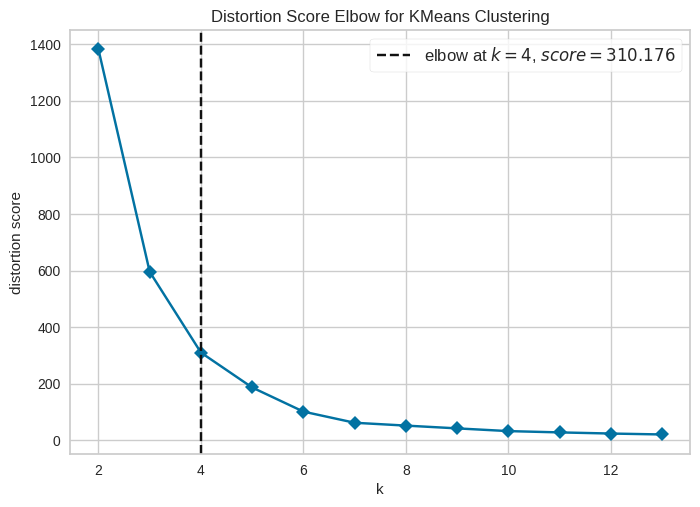

k = 2: Distortion = 1381.6978
k = 3: Distortion = 595.6952
k = 4: Distortion = 310.1755
k = 5: Distortion = 186.7734
k = 6: Distortion = 101.4727
k = 7: Distortion = 62.1042
k = 8: Distortion = 52.0414
k = 9: Distortion = 42.2367
k = 10: Distortion = 32.6158
k = 11: Distortion = 28.0115
k = 12: Distortion = 23.9960
k = 13: Distortion = 20.6966

--- Silhouette Method Results ---
k = 2: Silhouette Score = 0.9958
k = 3: Silhouette Score = 0.9933
k = 4: Silhouette Score = 0.9640
k = 5: Silhouette Score = 0.9631
k = 6: Silhouette Score = 0.9647
k = 7: Silhouette Score = 0.9673
k = 8: Silhouette Score = 0.9667
k = 9: Silhouette Score = 0.9660
k = 10: Silhouette Score = 0.9621
k = 11: Silhouette Score = 0.9621
k = 12: Silhouette Score = 0.9551
k = 13: Silhouette Score = 0.9551
k = 14: Silhouette Score = 0.9546


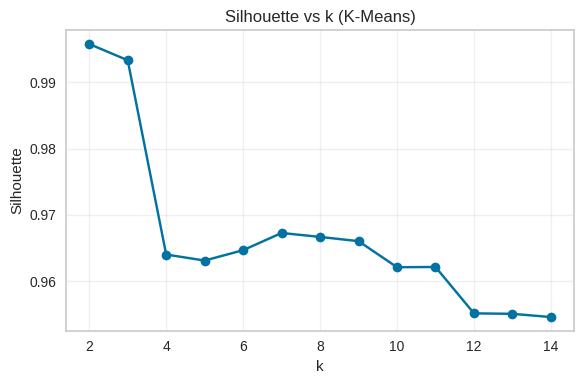


BEST k (based on Silhouette) = 2  |  Silhouette = 0.9958
(Elbow suggests k ≈ 4)

Explained variance (PC1+PC2): 1.000


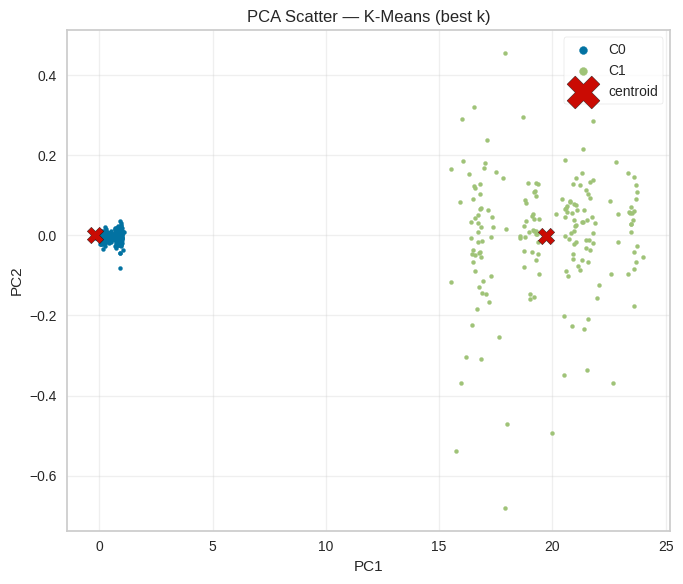

In [ ]:
# === 1-CELL KMEANS (OHLC ONLY) — Yellowbrick Elbow + Cluster Sizes ===
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ---------------- CONFIG ----------------
KEEP_DAYS    = 180
PER_COIN_MAX = 500
K_RANGE      = range(2, 15)
RNG = np.random.default_rng(42)

# ---------------- Validasi kolom minimal ----------------
req = {"symbol","date","open","high","low","close"}
assert req.issubset(df.columns), f"Kolom wajib hilang: {req - set(df.columns)}"

# ---------------- Sort, horizon, sampling per koin ----------------
df = df.loc[:, ["symbol","date","open","high","low","close"]].copy()
df["date"] = pd.to_datetime(df["date"], errors="coerce")
for c in ["open","high","low","close"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df = df.dropna().sort_values(["symbol","date"]).reset_index(drop=True)

# Horizon terakhir per koin
last_by_coin = df.groupby("symbol")["date"].transform("max")
cutoff = last_by_coin - pd.Timedelta(days=KEEP_DAYS)
df = df[df["date"] >= cutoff].copy()

# Sampling per koin (maks PER_COIN_MAX)
def per_coin_sample(g: pd.DataFrame) -> pd.DataFrame:
    n = len(g)
    if n <= PER_COIN_MAX: return g
    idx = RNG.choice(n, size=PER_COIN_MAX, replace=False)
    return g.iloc[np.sort(idx)]
df = df.groupby("symbol", group_keys=False).apply(per_coin_sample).reset_index(drop=True)

# ---------------- FITUR: OHLC ONLY  ----------------
Xdf = df[["open","high","low","close"]].copy()
Xdf = Xdf.replace([np.inf, -np.inf], np.nan).dropna()

# Sinkron index & scaling
df = df.loc[Xdf.index].reset_index(drop=True)
X  = StandardScaler().fit_transform(Xdf.to_numpy().astype("float32"))

# ---------------- Elbow  Yellowbrick (fallback manual) ----------------
best_k_elbow = None
print("\n--- Elbow Method Results (Yellowbrick) ---")
try:
    from yellowbrick.cluster import KElbowVisualizer
    model = KMeans(random_state=42, n_init=20)
    viz = KElbowVisualizer(model, k=(min(K_RANGE), max(K_RANGE)),
                           metric="distortion", timings=False)
    viz.fit(X)
    viz.show()
    ks = getattr(viz, "k_values_", list(K_RANGE))
    scores = getattr(viz, "k_scores_", None)
    if scores is not None:
        for k, s in zip(ks, scores):
            print(f"k = {int(k)}: Distortion = {float(s):.4f}")
    best_k_elbow = getattr(viz, "elbow_value_", None)
except Exception as e:
    print("(Yellowbrick tidak tersedia, pakai elbow manual.)")
    inertias = []
    for k in K_RANGE:
        km = KMeans(n_clusters=k, random_state=42, n_init=20).fit(X)
        inertias.append(float(km.inertia_))
        print(f"k = {k}: Inertia = {km.inertia_:.4f}")
    plt.figure(figsize=(6,4))
    plt.plot(list(K_RANGE), inertias, marker='o')
    plt.title('Elbow Curve (K-Means)')
    plt.xlabel('k'); plt.ylabel('Inertia (WCSS)')
    plt.grid(alpha=.3); plt.tight_layout(); plt.show()

# ---------------- Silhouette (pilih best k): daftar + plot ----------------
print("\n--- Silhouette Method Results ---")
sils = []
for k in K_RANGE:
    labels = KMeans(n_clusters=k, random_state=42, n_init=20).fit_predict(X)
    score  = silhouette_score(X, labels)
    sils.append(float(score))
    print(f"k = {k}: Silhouette Score = {score:.4f}")

best_k  = list(K_RANGE)[int(np.argmax(sils))]
best_sil = float(np.max(sils))

plt.figure(figsize=(6,4))
plt.plot(list(K_RANGE), sils, marker='o')
plt.title('Silhouette vs k (K-Means)')
plt.xlabel('k'); plt.ylabel('Silhouette')
plt.grid(alpha=.3); plt.tight_layout(); plt.show()

print(f"\nBEST k (based on Silhouette) = {best_k}  |  Silhouette = {best_sil:.4f}")
if best_k_elbow is not None:
    print(f"(Elbow suggests k ≈ {int(best_k_elbow)})")

# ----  PCA 2D scatter + centroids ----
pca = PCA(n_components=2, random_state=42).fit(X)
print(f"\nExplained variance (PC1+PC2): {pca.explained_variance_ratio_.sum():.3f}")

km = KMeans(n_clusters=best_k, random_state=42, n_init=20).fit(X)
labels = km.labels_
idx = np.arange(len(X)) if 'PLOT_SAMPLE' not in globals() else RNG.choice(len(X), size=min(PLOT_SAMPLE, len(X)), replace=False)
Z, y = pca.transform(X[idx]), labels[idx]
C = pca.transform(km.cluster_centers_)

plt.figure(figsize=(7,6))
for c in np.unique(y):
    m = (y == c)
    plt.scatter(Z[m,0], Z[m,1], s=8, label=f"C{int(c)}")
plt.scatter(C[:,0], C[:,1], s=140, marker='X', edgecolor='k', label='centroid')
plt.title('PCA Scatter — K-Means (best k)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend(markerscale=2, frameon=True); plt.grid(alpha=.3); plt.tight_layout(); plt.show()




##fitur turunan

/tmp/ipython-input-234884510.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby("symbol", group_keys=False).apply(per_coin_sample).reset_index(drop=True)



--- Elbow Method Results ---
k = 2: Inertia = 44129.7852
k = 3: Inertia = 26298.9297
k = 4: Inertia = 11920.5420
k = 5: Inertia = 7529.3135
k = 6: Inertia = 5464.7681
k = 7: Inertia = 4476.8662
k = 8: Inertia = 3584.2188
k = 9: Inertia = 2952.7937
k = 10: Inertia = 2124.4543


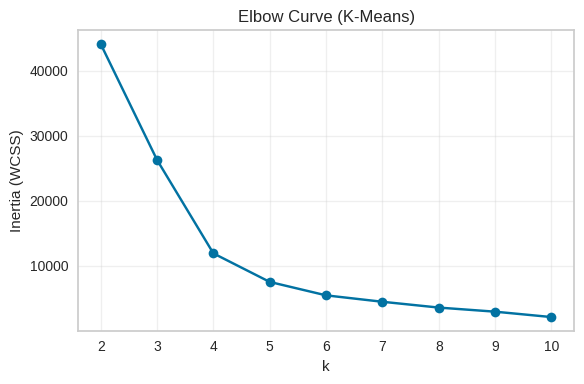


--- Silhouette Method Results ---
k = 2: Silhouette Score = 0.9990
k = 3: Silhouette Score = 0.9983
k = 4: Silhouette Score = 0.9984
k = 5: Silhouette Score = 0.9982
k = 6: Silhouette Score = 0.9890
k = 7: Silhouette Score = 0.9890
k = 8: Silhouette Score = 0.9859
k = 9: Silhouette Score = 0.9859
k = 10: Silhouette Score = 0.9860


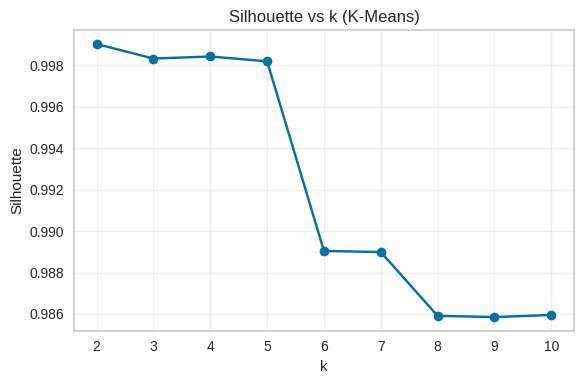


BEST k (based on Silhouette) = 2  |  Silhouette = 0.9990

Explained variance (PC1+PC2): 0.900


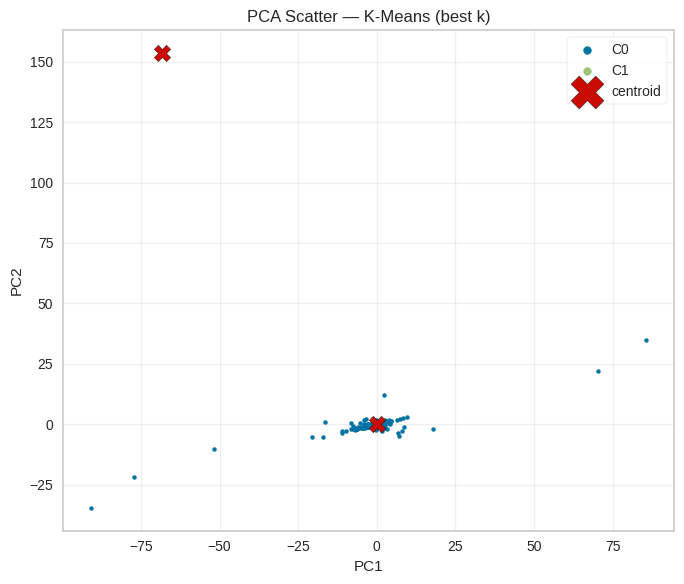

In [ ]:
# === 1-CELL KMEANS (CANDLE FEATURES) —
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# ---------------- CONFIG: samakan dengan DBSCAN ----------------
KEEP_DAYS    = 180
PER_COIN_MAX = 500
K_RANGE      = range(2, 11)   # 2..10
RNG = np.random.default_rng(42)

# ---------------- Validasi kolom minimal ----------------
req = {"symbol","date","open","high","low","close"}
assert req.issubset(df.columns), f"Kolom wajib hilang: {req - set(df.columns)}"

# ---------------- Sort, horizon, sampling per koin (match DBSCAN) ----------------
df = df.loc[:, ["symbol","date","open","high","low","close"]].copy()
df["date"] = pd.to_datetime(df["date"], errors="coerce")
for c in ["open","high","low","close"]:
    df[c] = pd.to_numeric(df[c], errors="coerce")
df = df.dropna().sort_values(["symbol","date"]).reset_index(drop=True)

# Horizon terakhir per koin
last_by_coin = df.groupby("symbol")["date"].transform("max")
cutoff = last_by_coin - pd.Timedelta(days=KEEP_DAYS)
df = df[df["date"] >= cutoff].copy()

# Sampling per koin (maks PER_COIN_MAX)
def per_coin_sample(g: pd.DataFrame) -> pd.DataFrame:
    n = len(g)
    if n <= PER_COIN_MAX: return g
    idx = RNG.choice(n, size=PER_COIN_MAX, replace=False)
    return g.iloc[np.sort(idx)]
df = df.groupby("symbol", group_keys=False).apply(per_coin_sample).reset_index(drop=True)

# ---------------- Fitur candle scale-invariant (match DBSCAN) ----------------
open_safe  = df["open"].replace(0, np.nan)
range_ratio = (df["high"] - df["low"]) / open_safe
body_ratio  = (df["close"] - df["open"]) / open_safe
upper_wick  = (df["high"] - np.maximum(df["open"], df["close"])) / open_safe
lower_wick  = (np.minimum(df["open"], df["close"]) - df["low"]) / open_safe

Xdf = pd.concat([
    range_ratio.rename("range_ratio"),
    body_ratio.rename("body_ratio"),
    upper_wick.rename("upper_wick_ratio"),
    lower_wick.rename("lower_wick_ratio"),
], axis=1).replace([np.inf, -np.inf], np.nan).dropna()

# Sinkron index dan scale
df = df.loc[Xdf.index].reset_index(drop=True)
X  = StandardScaler().fit_transform(Xdf.to_numpy().astype("float32"))

# ---------------- Elbow (k vs inertia): daftar + plot ----------------
print("\n--- Elbow Method Results ---")
inertias = []
for k in K_RANGE:
    km = KMeans(n_clusters=k, random_state=42, n_init=20).fit(X)
    inertias.append(float(km.inertia_))
    print(f"k = {k}: Inertia = {km.inertia_:.4f}")

plt.figure(figsize=(6,4))
plt.plot(list(K_RANGE), inertias, marker='o')
plt.title('Elbow Curve (K-Means)')
plt.xlabel('k'); plt.ylabel('Inertia (WCSS)')
plt.grid(alpha=.3); plt.tight_layout(); plt.show()

# ---------------- Silhouette (pilih best k): daftar + plot ----------------
print("\n--- Silhouette Method Results ---")
sils = []
for k in K_RANGE:
    labels = KMeans(n_clusters=k, random_state=42, n_init=20).fit_predict(X)
    score  = silhouette_score(X, labels)
    sils.append(float(score))
    print(f"k = {k}: Silhouette Score = {score:.4f}")

best_k  = list(K_RANGE)[int(np.argmax(sils))]
best_sil = float(np.max(sils))

plt.figure(figsize=(6,4))
plt.plot(list(K_RANGE), sils, marker='o')
plt.title('Silhouette vs k (K-Means)')
plt.xlabel('k'); plt.ylabel('Silhouette')
plt.grid(alpha=.3); plt.tight_layout(); plt.show()

print(f"\nBEST k (based on Silhouette) = {best_k}  |  Silhouette = {best_sil:.4f}")

# ----  PCA 2D scatter + centroids (visual cek) ----
pca = PCA(n_components=2, random_state=42).fit(X)
print(f"\nExplained variance (PC1+PC2): {pca.explained_variance_ratio_.sum():.3f}")

km = KMeans(n_clusters=best_k, random_state=42, n_init=20).fit(X)
idx = np.arange(len(X)) if 'PLOT_SAMPLE' not in globals() else RNG.choice(len(X), size=min(PLOT_SAMPLE, len(X)), replace=False)
Z, y = pca.transform(X[idx]), km.labels_[idx]
C = pca.transform(km.cluster_centers_)

plt.figure(figsize=(7,6))
for c in np.unique(y):
    m = (y == c)
    plt.scatter(Z[m,0], Z[m,1], s=8, label=f"C{int(c)}")
plt.scatter(C[:,0], C[:,1], s=140, marker='X', edgecolor='k', label='centroid')
plt.title('PCA Scatter — K-Means (best k)')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend(markerscale=2, frameon=True); plt.grid(alpha=.3); plt.tight_layout(); plt.show()




# dbscan


In [ ]:
#@title ⬇️ 1) Setup & Utilities
from __future__ import annotations
from pathlib import Path
from typing import Dict, Tuple, List, Optional

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

RNG = np.random.default_rng(42)

def load_and_downcast(csv_path: Path) -> pd.DataFrame:
    df = pd.read_csv(csv_path)
    df.columns = [c.strip().lower() for c in df.columns]
    need = {"symbol","date","open","high","low","close"}
    miss = need - set(df.columns)
    if miss:
        raise ValueError(f"Missing columns: {miss}")
    df = df.loc[:, ["symbol","date","open","high","low","close"]].copy()
    df["symbol"] = df["symbol"].astype("category")
    df["date"]   = pd.to_datetime(df["date"], errors="coerce")
    for c in ["open","high","low","close"]:
        df[c] = pd.to_numeric(df[c], errors="coerce").astype("float32")
    df = df.dropna().sort_values(["symbol","date"]).reset_index(drop=True)
    return df

def limit_horizon_and_sample(df: pd.DataFrame, keep_days=180, per_coin_max=500) -> pd.DataFrame:
    last_by_coin = df.groupby("symbol")["date"].transform("max")
    cutoff = last_by_coin - pd.Timedelta(days=keep_days)
    df = df[df["date"] >= cutoff].copy()

    def per_coin_sample(g: pd.DataFrame) -> pd.DataFrame:
        n = len(g)
        if n <= per_coin_max:
            return g
        idx = RNG.choice(n, size=per_coin_max, replace=False)
        return g.iloc[np.sort(idx)]

    return df.groupby("symbol", group_keys=False).apply(per_coin_sample).reset_index(drop=True)

def build_features_ohlc(df: pd.DataFrame, features: List[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    Xdf = df[features].copy()
    Xdf = Xdf.replace([np.inf, -np.inf], np.nan).dropna()
    df_sync = df.loc[Xdf.index].reset_index(drop=True)
    Xdf = Xdf.reset_index(drop=True)
    return df_sync, Xdf

def standardize(Xdf: pd.DataFrame, use_groupwise=False, symbols: Optional[pd.Series]=None) -> np.ndarray:
    X = Xdf.to_numpy().astype("float32")
    if use_groupwise and symbols is not None:
        arr = X.copy()
        sym = symbols.to_numpy()
        for s in np.unique(sym):
            m = (sym == s)
            mu = arr[m].mean(axis=0, dtype=np.float64)
            sd = arr[m].std(axis=0, ddof=0, dtype=np.float64)
            sd[sd == 0] = 1.0
            arr[m] = ((arr[m] - mu) / sd).astype("float32")
        return arr
    return StandardScaler().fit_transform(X).astype("float32")

def plot_elbow_silhouette(K_RANGE, inertias, sils, fig_elbow="pc_kmeans_elbow.png", fig_sil="pc_kmeans_silhouette.png"):
    plt.figure(); plt.plot(list(K_RANGE), inertias, marker='o')
    plt.title("Elbow Curve (MiniBatchKMeans)"); plt.xlabel("k"); plt.ylabel("Inertia (WCSS)")
    plt.grid(alpha=.3); plt.tight_layout(); plt.savefig(fig_elbow); plt.show()

    yy = [np.nan if s is None else s for s in sils]
    plt.figure(); plt.plot(list(K_RANGE), yy, marker='o')
    plt.title("Silhouette vs k (MiniBatchKMeans, sample)"); plt.xlabel("k"); plt.ylabel("Silhouette")
    plt.grid(alpha=.3); plt.tight_layout(); plt.savefig(fig_sil); plt.show()

def pca_scatter(Xz, labels, title, savepath):
    n = len(Xz)
    idx = RNG.choice(n, size=min(12000, n), replace=False)
    Xs = Xz[idx]; ys = np.array(labels)[idx]
    Z = PCA(n_components=2, random_state=42).fit_transform(Xs)
    plt.figure()
    for c in np.unique(ys):
        m = ys == c
        plt.scatter(Z[m,0], Z[m,1], s=8, label=f"C{int(c)}")
    plt.title(title); plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.legend(markerscale=2, frameon=True); plt.grid(alpha=.3)
    plt.tight_layout(); plt.savefig(savepath); plt.show()


In [ ]:
#@title ⬇️ 2) Load Data & Subset (RAM)
USE_KAGGLEHUB = True  #@param {type:"boolean"}
KAGGLE_DATASET = "imtkaggleteam/top-100-cryptocurrency-2020-2025" #@param {type:"string"}
KAGGLE_FILENAME = "top_100_cryptos_with_correct_network.csv"       #@param {type:"string"}
CSV_PATH_LOCAL = "top_100_cryptos_with_correct_network.csv"        #@param {type:"string"}

KEEP_DAYS = 180     #@param {type:"integer"}
PER_COIN_MAX = 500  #@param {type:"integer"}

from pathlib import Path
if USE_KAGGLEHUB:
    try:
        import kagglehub
        base = kagglehub.dataset_download(KAGGLE_DATASET)
        csv_path = Path(base) / KAGGLE_FILENAME
        assert csv_path.exists(), "File not found in KaggleHub path"
    except Exception as e:
        print("[WARN] KaggleHub failed, using local.", e)
        csv_path = Path(CSV_PATH_LOCAL)
else:
    csv_path = Path(CSV_PATH_LOCAL)

df = load_and_downcast(csv_path)
df = limit_horizon_and_sample(df, keep_days=KEEP_DAYS, per_coin_max=PER_COIN_MAX)
print(df.head(), "\nrows:", len(df), "symbols:", df["symbol"].nunique())


Using Colab cache for faster access to the 'top-100-cryptocurrency-2020-2025' dataset.
    symbol       date    open    high     low   close
0  ADAUSDT 2025-02-06  0.7325  0.7660  0.6978  0.7052
1  ADAUSDT 2025-02-07  0.7052  0.7532  0.6902  0.7072
2  ADAUSDT 2025-02-08  0.7072  0.7180  0.6815  0.7005
3  ADAUSDT 2025-02-09  0.7006  0.7160  0.6503  0.6814
4  ADAUSDT 2025-02-10  0.6815  0.7245  0.6632  0.7121 
rows: 18100 symbols: 100


/tmp/ipython-input-2330898258.py:31: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  last_by_coin = df.groupby("symbol")["date"].transform("max")
/tmp/ipython-input-2330898258.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby("symbol", group_keys=False).apply(per_coin_sample).reset_index(drop=True)
/tmp/ipython-input-2330898258.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or

In [ ]:
#@title ⬇️ 3) Pilih Fitur & Standardize
FEATURES_STR = "open,high,low,close"  #@param {type:"string"}
USE_GROUPWISE_ZSCORE = False          #@param {type:"boolean"}

features = [s.strip().lower() for s in FEATURES_STR.split(",") if s.strip()]
df_sync, Xdf = build_features_ohlc(df, features)
Xdf = Xdf[features].copy()
Xz = standardize(Xdf, use_groupwise=USE_GROUPWISE_ZSCORE, symbols=(df_sync["symbol"] if USE_GROUPWISE_ZSCORE else None))
print("Features:", features, " | shape:", Xz.shape)

Features: ['open', 'high', 'low', 'close']  | shape: (18100, 4)


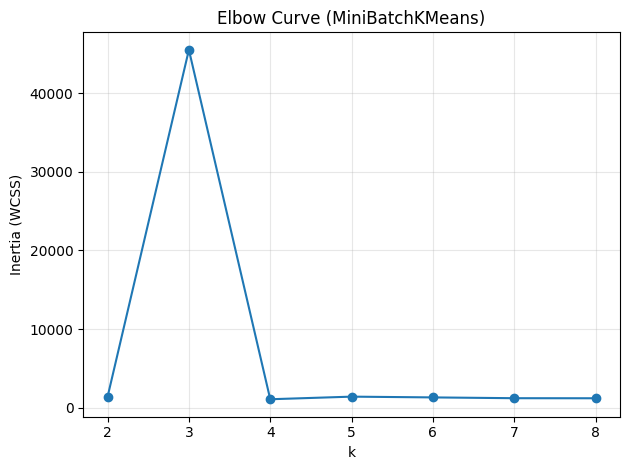

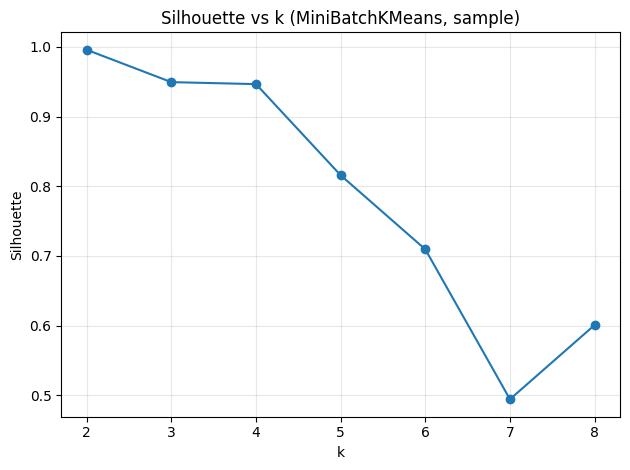

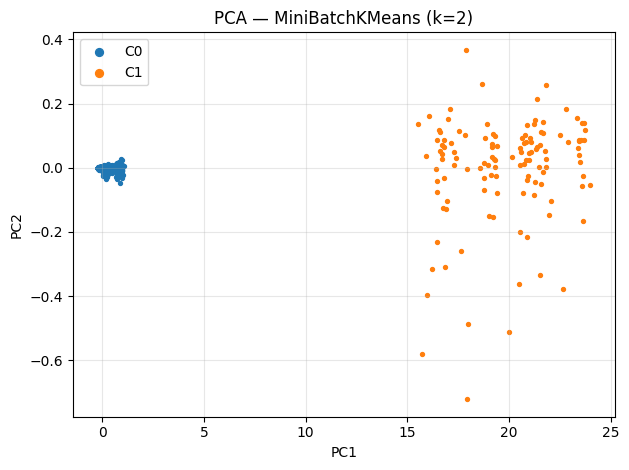

Best K: 2 Sil(sample): 0.9957833886146545


In [ ]:
#@title ⬇️ 4) K-Means (MiniBatch): Elbow, Silhouette, PCA
K_RANGE_MIN = 2  #@param {type:"integer"}
K_RANGE_MAX = 8  #@param {type:"integer"}
SIL_SAMPLE   = 20000  #@param {type:"integer"}

K_RANGE = range(K_RANGE_MIN, K_RANGE_MAX+1)
n = len(Xz)
idx_sil = RNG.choice(n, size=min(SIL_SAMPLE, n), replace=False)
Xs = Xz[idx_sil]

rows, inertias, sils = [], [], []
best_k, best_sil, best_lab = None, -1.0, None

for k in K_RANGE:
    km = MiniBatchKMeans(n_clusters=k, batch_size=2048, n_init=5, random_state=42)
    lab = km.fit_predict(Xz)
    inertias.append(float(km.inertia_))
    m = lab[idx_sil]
    sil = silhouette_score(Xs, m) if len(set(m)) > 1 else np.nan
    sils.append(None if np.isnan(sil) else float(sil))
    rows.append({"K": k, "Inertia": km.inertia_, "Silhouette(sample)": None if np.isnan(sil) else float(sil)})
    if not np.isnan(sil) and sil > best_sil:
        best_k, best_sil, best_lab = k, float(sil), lab

kgrid = pd.DataFrame(rows)
kgrid.to_csv("pc_kmeans_grid.csv", index=False)
plot_elbow_silhouette(K_RANGE, inertias, sils)

if best_lab is not None:
    pca_scatter(Xz, best_lab, f"PCA — MiniBatchKMeans (k={best_k})", "pc_kmeans_pca_scatter.png")
print("Best K:", best_k, "Sil(sample):", best_sil)


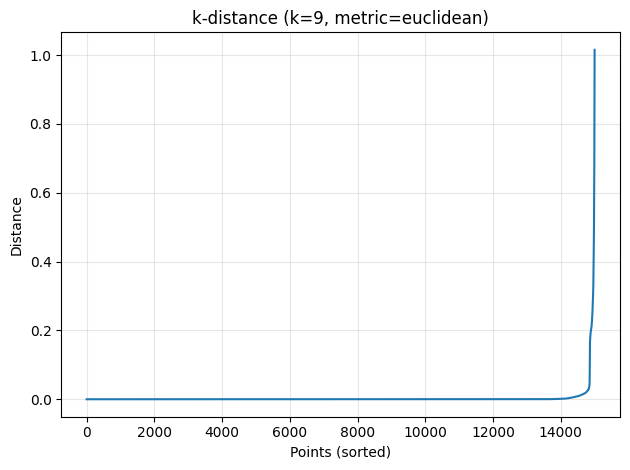

In [ ]:
#@title ⬇️ 5) DBSCAN: k-distance, grid eps / manual, PCA
DBSCAN_MIN_SAMPLES = None        #@param {type:"integer"}
DBSCAN_EPS = None                #@param {type:"number"}
DBSCAN_METRIC = "euclidean"      #@param ["euclidean","manhattan","cosine"]
SIL_SAMPLE = 20000               #@param {type:"integer"}
KDIST_SAMPLE = 15000             #@param {type:"integer"}

min_samples = (DBSCAN_MIN_SAMPLES if DBSCAN_MIN_SAMPLES is not None else max(5, 2*Xz.shape[1]))

# k-distance (sample)
n = len(Xz)
idx_kd = RNG.choice(n, size=min(KDIST_SAMPLE, n), replace=False)
X_kd = Xz[idx_kd]
nbrs = NearestNeighbors(n_neighbors=int(min_samples)+1, metric=DBSCAN_METRIC, algorithm="auto").fit(X_kd)
dists, _ = nbrs.kneighbors(X_kd)
kdist = np.sort(dists[:, -1].astype("float32"))
plt.figure(); plt.plot(kdist)
plt.title(f"k-distance (k={min_samples+1}, metric={DBSCAN_METRIC})"); plt.xlabel("Points (sorted)"); plt.ylabel("Distance")
plt.grid(alpha=.3); plt.tight_layout(); plt.savefig("pc_dbscan_kdistance.png"); plt.show()

# kandidat eps
if DBSCAN_EPS is None:
    cand = np.unique(np.concatenate([
        np.percentile(kdist, [60,70,80,85,90,92,95,97,98]).astype("float32"),
        np.linspace(float(kdist.min()), float(kdist.max()), 7).astype("float32")
    ])).tolist()
    cand = [float(e) for e in cand if np.isfinite(e) and e > 1e-6]
else:
    cand = [float(DBSCAN_EPS)]

# eval
idx_sil = RNG.choice(n, size=min(SIL_SAMPLE, n), replace=False)
Xs = Xz[idx_sil]
rows, best = [], {"score": (-2,-1)}
for eps in cand:
    lab = DBSCAN(eps=eps, min_samples=int(min_samples), metric=DBSCAN_METRIC).fit_predict(Xz)
    ms = lab[idx_sil] != -1
    uniq = np.unique(lab[idx_sil][ms])
    if len(uniq) >= 2:
        sil = silhouette_score(Xs[ms], lab[idx_sil][ms])
        dbi = davies_bouldin_score(Xs[ms], lab[idx_sil][ms])
        score = (sil, -float(np.mean(lab == -1)))
    else:
        sil, dbi, score = np.nan, np.nan, (-2, -float(np.mean(lab == -1)))
    noise = float(np.mean(lab == -1))
    rows.append({"eps": float(eps), "min_samples": int(min_samples), "metric": DBSCAN_METRIC,
                 "n_clusters": int(len([u for u in np.unique(lab) if u != -1])),
                 "noise_ratio": noise,
                 "Silhouette(sample non-noise)": None if np.isnan(sil) else float(sil),
                 "DBI(sample non-noise)": None if np.isnan(dbi) else float(dbi)})
    if score > best["score"]:
        best = {"score": score, "eps": float(eps), "min_samples": int(min_samples), "metric": DBSCAN_METRIC,
                "labels": lab, "sil": None if np.isnan(sil) else float(sil),
                "dbi": None if np.isnan(dbi) else float(dbi), "noise": float(noise)}

dbgrid = pd.DataFrame(rows).sort_values(["Silhouette(sample non-noise)","noise_ratio"], ascending=[False,True])
dbgrid.to_csv("pc_dbscan_trials.csv", index=False)

labs = np.array(best["labels"]) if "labels" in best else np.array([])
if labs.size > 0 and (labs != -1).sum() > 1 and len(np.unique(labs[labs!=-1])) >= 2:
    idx_plot = np.where(labs != -1)[0]
    if len(idx_plot) > 12000:
        idx_plot = RNG.choice(idx_plot, size=12000, replace=False)
    Z = PCA(n_components=2, random_state=42).fit_transform(Xz[idx_plot])
    yp = labs[idx_plot]
    plt.figure()
    for c in np.unique(yp):
        m = yp == c
        plt.scatter(Z[m, 0], Z[m, 1], s=8, label=f"C{int(c)}")
    ttl = f"PCA — DBSCAN (eps={best['eps']}, min_samples={best['min_samples']}, metric={DBSCAN_METRIC}) — non-noise"
else:
    idx_plot = RNG.choice(n, size=min(12000, n), replace=False)
    Z = PCA(n_components=2, random_state=42).fit_transform(Xz[idx_plot])
    plt.figure(); plt.scatter(Z[:, 0], Z[:, 1], s=8, label="noise")
    ttl = "PCA — DBSCAN: no meaningful clusters (adjust eps/min_samples)"
plt.title(ttl); plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(markerscale=2, frameon=True); plt.grid(alpha=.3)
plt.tight_layout(); plt.savefig("pc_dbscan_pca_scatter.png"); plt.show()

print("Best DBSCAN → eps:", best.get("eps"), "min_samples:", best.get("min_samples"),
      "sil:", best.get("sil"), "noise:", best.get("noise"))


In [ ]:
#@title ⬇️ 6) Simpan Label & Profil Klaster
# gunakan best_lab (K-Means) dan labs (DBSCAN) dari cell sebelumnya
labels_df = df_sync.loc[:, ["symbol","date"]].copy()
labels_df["kmeans_label"] = best_lab if best_lab is not None else np.nan
labels_df["dbscan_label"] = labs if labs.size>0 else np.nan
labels_df.to_csv("pc_cluster_labels.csv", index=False)

# Profil median per klaster
if best_lab is not None:
    kprof = pd.concat([labels_df[["kmeans_label"]], Xdf], axis=1).groupby("kmeans_label").median().reset_index()
    kprof.to_csv("pc_kmeans_profiles.csv", index=False)
if labs.size>0 and (labs != -1).sum() > 0:
    dprof = pd.concat([labels_df[labels_df["dbscan_label"]!=-1][["dbscan_label"]],
                       Xdf.loc[labels_df["dbscan_label"]!=-1]], axis=1).groupby("dbscan_label").median().reset_index()
    dprof.to_csv("pc_dbscan_profiles.csv", index=False)

pd.concat([df_sync[["symbol","date"]], Xdf], axis=1).to_csv("pc_feature_matrix_sampled.csv", index=False)
print("Saved CSV and PNG files.")


Using Colab cache for faster access to the 'top-100-cryptocurrency-2020-2025' dataset.
[INFO] Using KaggleHub dataset: /kaggle/input/top-100-cryptocurrency-2020-2025/top_100_cryptos_with_correct_network.csv


/tmp/ipython-input-3529771634.py:122: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  last_by_coin = df.groupby("symbol")["date"].transform("max")
/tmp/ipython-input-3529771634.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return df.groupby("symbol", group_keys=False).apply(per_coin_sample).reset_index(drop=True)
/tmp/ipython-input-3529771634.py:133: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings

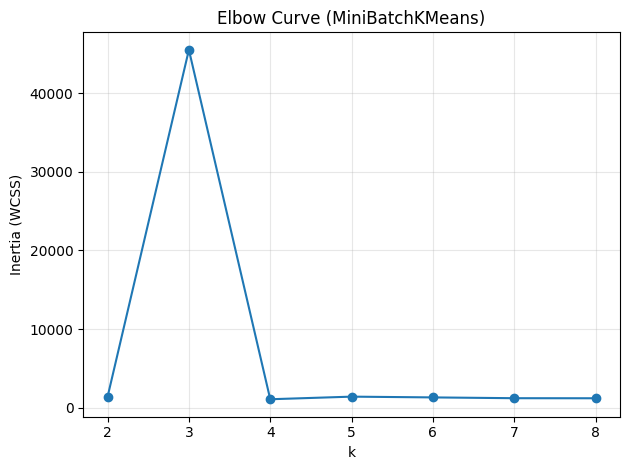

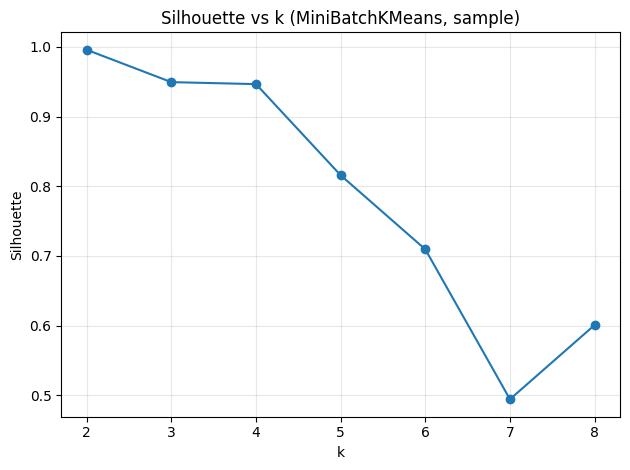

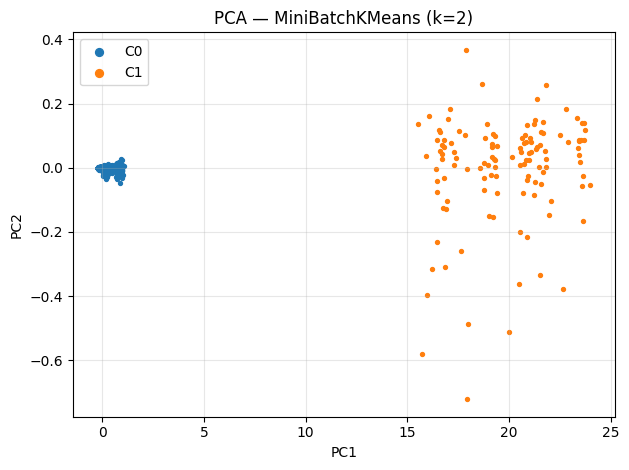

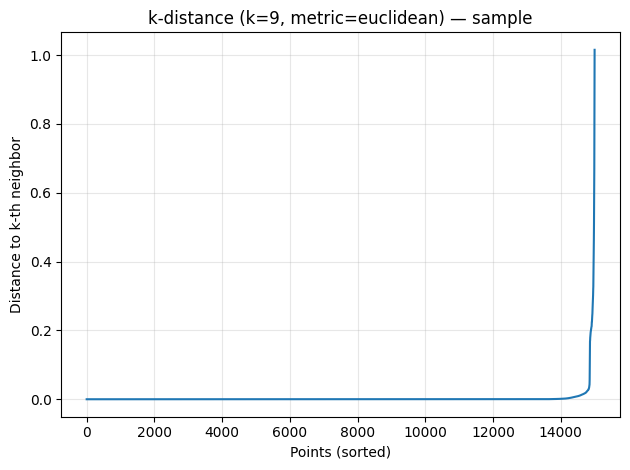

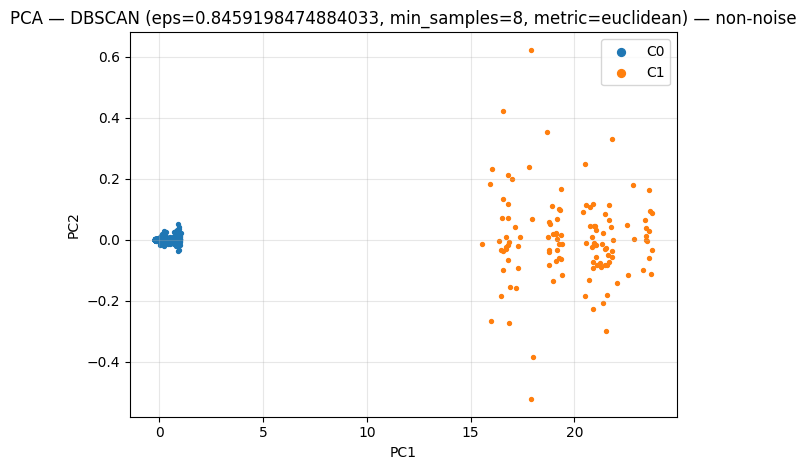

{'rows_used': 18100, 'kmeans_best_k': 2, 'kmeans_silhouette_sample': 0.9957833886146545, 'dbscan_best_eps': 0.8459198474884033, 'dbscan_min_samples': 8, 'dbscan_noise_ratio': 0.0, 'saved_png': ['pc_kmeans_elbow.png', 'pc_kmeans_silhouette.png', 'pc_kmeans_pca_scatter.png', 'pc_dbscan_kdistance.png', 'pc_dbscan_pca_scatter.png'], 'saved_csv': ['pc_feature_matrix_sampled.csv', 'pc_cluster_labels.csv', 'pc_kmeans_grid.csv', 'pc_dbscan_trials.csv', 'pc_kmeans_profiles.csv', 'pc_dbscan_profiles.csv']}


In [ ]:
"""
PER-CANDLE CLUSTERING — TANPA FITUR TURUNAN (OHLC SAJA), RAM-FRIENDLY, DENGAN VISUAL
- Fitur: open, high, low, close (tanpa turunan), lalu standardize
- Opsi: z-score per-koin (agar relatif per koin), atau global
- MiniBatchKMeans: elbow, silhouette (sample), PCA scatter
- DBSCAN: k-distance (sample), grid eps (atau manual), PCA scatter
- Simpan PNG & CSV

Catatan DBSCAN:
- min_samples = minimal tetangga di dalam radius eps agar sebuah titik jadi "inti" (core)
- eps         = radius tetangga
- metric      = metrik jarak (euclidean/manhattan/cosine/dll.)
"""

from __future__ import annotations
from pathlib import Path
from typing import Dict, Tuple, List, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score


# =========================
# CONFIG
# =========================
class Config:
    # Sumber data
    USE_KAGGLEHUB: bool = True  # True: coba ambil via kagglehub; jika gagal → CSV_PATH_LOCAL
    KAGGLE_DATASET: str = "imtkaggleteam/top-100-cryptocurrency-2020-2025"
    KAGGLE_FILENAME: str = "top_100_cryptos_with_correct_network.csv"
    CSV_PATH_LOCAL: str = "top_100_cryptos_with_correct_network.csv"

    # Standardisasi
    USE_GROUPWISE_ZSCORE: bool = False  # True: z-score per-koin; False: z-score global

    # Penghemat RAM
    KEEP_DAYS: int = 180          # horizon hari terakhir per koin
    PER_COIN_MAX: int = 500       # maksimum baris per koin setelah filter
    K_RANGE: range = range(2, 9)  # K untuk MiniBatchKMeans
    SIL_SAMPLE: int = 20_000      # sampel untuk Silhouette/DBI
    KDIST_SAMPLE: int = 15_000    # sampel untuk k-distance
    PLOT_SAMPLE: int = 12_000     # sampel untuk PCA scatter
    RANDOM_SEED: int = 42

    # --- PARAM DBSCAN (tambahan sesuai permintaan) ---
    # min_samples = jumlah minimal tetangga dalam radius eps agar titik menjadi "inti"
    DBSCAN_MIN_SAMPLES: Optional[int] = None   # None => otomatis: max(5, 2*dim)
    # eps = radius tetangga; jika None => dicari otomatis via k-distance percentile grid
    DBSCAN_EPS: Optional[float] = None         # contoh set manual: 0.9
    # metric jarak opsional (euclidean/manhattan/cosine, dll.)
    DBSCAN_METRIC: str = "euclidean"

    # Output
    OUTDIR: Path = Path(".")
    FIG_ELBOW: Path = OUTDIR / "pc_kmeans_elbow.png"
    FIG_SIL:   Path = OUTDIR / "pc_kmeans_silhouette.png"
    FIG_KMSC:  Path = OUTDIR / "pc_kmeans_pca_scatter.png"
    FIG_KDST:  Path = OUTDIR / "pc_dbscan_kdistance.png"
    FIG_DBSC:  Path = OUTDIR / "pc_dbscan_pca_scatter.png"

    CSV_DATA:    Path = OUTDIR / "pc_feature_matrix_sampled.csv"
    CSV_RESULTS: Path = OUTDIR / "pc_cluster_labels.csv"
    CSV_KGRID:   Path = OUTDIR / "pc_kmeans_grid.csv"
    CSV_KPROF:   Path = OUTDIR / "pc_kmeans_profiles.csv"
    CSV_DBGRID:  Path = OUTDIR / "pc_dbscan_trials.csv"
    CSV_DBPROF:  Path = OUTDIR / "pc_dbscan_profiles.csv"


CFG = Config()
RNG = np.random.default_rng(CFG.RANDOM_SEED)


# =========================
# UTILITIES
# =========================
def get_dataset_path() -> Path:
    """Cari path dataset dari kagglehub (kalau tersedia), jika tidak pakai lokal."""
    if CFG.USE_KAGGLEHUB:
        try:
            import kagglehub  # type: ignore
            base = kagglehub.dataset_download(CFG.KAGGLE_DATASET)
            csv_path = Path(base) / CFG.KAGGLE_FILENAME
            if csv_path.exists():
                print(f"[INFO] Using KaggleHub dataset: {csv_path}")
                return csv_path
            print("[WARN] KaggleHub path exists but file missing; fallback to local.")
        except Exception as e:
            print(f"[WARN] KaggleHub unavailable/failed: {e}. Fallback to local.")
    csv_path = Path(CFG.CSV_PATH_LOCAL)
    if not csv_path.exists():
        raise FileNotFoundError(f"CSV not found: {csv_path.resolve()}")
    print(f"[INFO] Using local CSV: {csv_path}")
    return csv_path


def load_and_downcast(csv_path: Path) -> pd.DataFrame:
    """Load kolom minimal, downcast ke float32/category, sort."""
    df = pd.read_csv(csv_path)
    df.columns = [c.strip().lower() for c in df.columns]
    need = {"symbol", "date", "open", "high", "low", "close"}
    miss = need - set(df.columns)
    if miss:
        raise ValueError(f"Missing required columns: {miss}. Available: {list(df.columns)[:30]}")
    df = df.loc[:, ["symbol", "date", "open", "high", "low", "close"]].copy()
    df["symbol"] = df["symbol"].astype("category")
    df["date"]   = pd.to_datetime(df["date"], errors="coerce")
    for c in ["open","high","low","close"]:
        df[c] = pd.to_numeric(df[c], errors="coerce").astype("float32")
    df = df.dropna().sort_values(["symbol","date"]).reset_index(drop=True)
    return df


def limit_horizon_and_sample(df: pd.DataFrame) -> pd.DataFrame:
    """Ambil KEEP_DAYS terakhir tiap koin + sampling maksimal PER_COIN_MAX per koin."""
    last_by_coin = df.groupby("symbol")["date"].transform("max")
    cutoff = last_by_coin - pd.Timedelta(days=CFG.KEEP_DAYS)
    df = df[df["date"] >= cutoff].copy()

    def per_coin_sample(g: pd.DataFrame) -> pd.DataFrame:
        n = len(g)
        if n <= CFG.PER_COIN_MAX:
            return g
        idx = RNG.choice(n, size=CFG.PER_COIN_MAX, replace=False)
        return g.iloc[np.sort(idx)]

    return df.groupby("symbol", group_keys=False).apply(per_coin_sample).reset_index(drop=True)


def build_features_ohlc(df: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    """Versi TANPA fitur turunan: pakai OHLC apa adanya."""
    Xdf = df[["open","high","low","close"]].copy()
    Xdf = Xdf.replace([np.inf, -np.inf], np.nan).dropna()
    df_sync = df.loc[Xdf.index].reset_index(drop=True)
    Xdf = Xdf.reset_index(drop=True)
    return df_sync, Xdf


def standardize(Xdf: pd.DataFrame, symbols: Optional[pd.Series] = None) -> np.ndarray:
    """
    Standardisasi ke float32.
    - Jika symbols diberikan dan USE_GROUPWISE_ZSCORE=True, lakukan z-score per-koin.
    - Jika tidak, z-score global.
    """
    X = Xdf.to_numpy().astype("float32")
    if CFG.USE_GROUPWISE_ZSCORE and symbols is not None:
        arr = X.copy()
        sym = symbols.to_numpy()
        for s in np.unique(sym):
            m = (sym == s)
            mu = arr[m].mean(axis=0, dtype=np.float64)
            sd = arr[m].std(axis=0, ddof=0, dtype=np.float64)
            sd[sd == 0] = 1.0
            arr[m] = ((arr[m] - mu) / sd).astype("float32")
        return arr
    # global
    return StandardScaler().fit_transform(X).astype("float32")


def plot_elbow_silhouette(inertias: List[float], sils: List[Optional[float]]) -> None:
    # Elbow
    plt.figure()
    plt.plot(list(CFG.K_RANGE), inertias, marker='o')
    plt.title("Elbow Curve (MiniBatchKMeans)")
    plt.xlabel("k"); plt.ylabel("Inertia (WCSS)")
    plt.grid(alpha=.3); plt.tight_layout(); plt.savefig(CFG.FIG_ELBOW); plt.show()

    # Silhouette
    y = [np.nan if s is None else s for s in sils]
    plt.figure()
    plt.plot(list(CFG.K_RANGE), y, marker='o')
    plt.title("Silhouette vs k (MiniBatchKMeans, sample)")
    plt.xlabel("k"); plt.ylabel("Silhouette")
    plt.grid(alpha=.3); plt.tight_layout(); plt.savefig(CFG.FIG_SIL); plt.show()


def pca_scatter(Xz: np.ndarray, labels: np.ndarray, title: str, savepath: Path) -> None:
    n = len(Xz)
    idx = RNG.choice(n, size=min(CFG.PLOT_SAMPLE, n), replace=False)
    Xs = Xz[idx]; ys = np.array(labels)[idx]
    Z = PCA(n_components=2, random_state=CFG.RANDOM_SEED).fit_transform(Xs)
    plt.figure()
    for c in np.unique(ys):
        m = ys == c
        plt.scatter(Z[m, 0], Z[m, 1], s=8, label=f"C{int(c)}")
    plt.title(title); plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.legend(markerscale=2, frameon=True); plt.grid(alpha=.3)
    plt.tight_layout(); plt.savefig(savepath); plt.show()


def run_kmeans(Xz: np.ndarray) -> Tuple[int, float, np.ndarray, pd.DataFrame]:
    """MiniBatchKMeans grid K; return best_k, best_sil(sample), labels, grid_df."""
    rows, inertias, sils = [], [], []
    n = len(Xz)
    idx_sil = RNG.choice(n, size=min(CFG.SIL_SAMPLE, n), replace=False)
    Xs = Xz[idx_sil]

    best_k, best_sil, best_lab = None, -1.0, None
    for k in CFG.K_RANGE:
        km = MiniBatchKMeans(n_clusters=k, batch_size=2048, n_init=5, random_state=CFG.RANDOM_SEED)
        lab = km.fit_predict(Xz)
        inertias.append(float(km.inertia_))
        m = lab[idx_sil]
        sil = silhouette_score(Xs[m != -1], lab[idx_sil][m != -1]) if len(set(lab[idx_sil][m != -1])) > 1 else np.nan
        sils.append(None if np.isnan(sil) else float(sil))
        rows.append({"K": k, "Inertia": float(km.inertia_), "Silhouette(sample)": (None if np.isnan(sil) else float(sil))})
        if not np.isnan(sil) and (best_k is None or sil > best_sil):
            best_k, best_sil, best_lab = k, float(sil), lab

    grid_df = pd.DataFrame(rows)
    grid_df.to_csv(CFG.CSV_KGRID, index=False)
    plot_elbOW_silhouette = plot_elbow_silhouette  # alias sederhana
    plot_elbOW_silhouette(inertias, sils)
    if best_lab is not None:
        pca_scatter(Xz, best_lab, f"PCA — MiniBatchKMeans (k={best_k})", CFG.FIG_KMSC)
    else:
        print("[WARN] No valid clusters found for K-Means PCA scatter.")
    return int(best_k) if best_k is not None else -1, float(best_sil) if best_sil is not None else -1, best_lab if best_lab is not None else np.array([]), grid_df


def k_distance_curve(Xz: np.ndarray, min_samples: int) -> np.ndarray:
    """Hitung k-distance di sampel dan plot (mengikuti CFG.DBSCAN_METRIC)."""
    n = len(Xz)
    idx_kd = RNG.choice(n, size=min(CFG.KDIST_SAMPLE, n), replace=False)
    X_kd = Xz[idx_kd]
    nbrs = NearestNeighbors(
        n_neighbors=int(min_samples) + 1,
        metric=CFG.DBSCAN_METRIC,
        algorithm="auto"
    ).fit(X_kd)
    dists, _ = nbrs.kneighbors(X_kd)
    kdist = np.sort(dists[:, -1].astype("float32"))
    plt.figure()
    plt.plot(kdist)
    plt.title(f"k-distance (k={min_samples+1}, metric={CFG.DBSCAN_METRIC}) — sample")
    plt.xlabel("Points (sorted)"); plt.ylabel("Distance to k-th neighbor")
    plt.grid(alpha=.3); plt.tight_layout(); plt.savefig(CFG.FIG_KDST); plt.show()
    return kdist


def candidate_eps_from_kdist(kdist: np.ndarray) -> List[float]:
    cand = np.unique(np.concatenate([
        np.percentile(kdist, [60, 70, 80, 85, 90, 92, 95, 97, 98]).astype("float32"),
        np.linspace(float(kdist.min()), float(kdist.max()), 7).astype("float32")
    ])).tolist()
    cand = [float(e) for e in cand if np.isfinite(e) and e > 1e-6]  # wajib > 0
    if not cand:
        cand = [0.5, 0.7, 0.9, 1.1, 1.3]  # fallback wajar utk data z-score
    return sorted(cand)


def run_dbscan(Xz: np.ndarray) -> Tuple[Dict, pd.DataFrame]:
    """
    DBSCAN grid eps atau manual:
    - min_samples = minimal tetangga dalam radius `eps` agar titik jadi "inti"
    - eps         = radius tetangga
    - metric      = metrik jarak (euclidean/manhattan/cosine, dst.)
    """
    # Tentukan min_samples (manual atau otomatis)
    min_samples = CFG.DBSCAN_MIN_SAMPLES if CFG.DBSCAN_MIN_SAMPLES is not None else max(5, 2 * Xz.shape[1])

    # k-distance selalu diplot (berguna untuk justifikasi), lalu tentukan kandidat eps
    kdist = k_distance_curve(Xz, min_samples)
    if CFG.DBSCAN_EPS is None:
        candidates = candidate_eps_from_kdist(kdist)
    else:
        candidates = [float(CFG.DBSCAN_EPS)]

    # evaluasi (silhouette pada non-noise; tie-break via noise lebih kecil)
    n = len(Xz)
    idx_sil = RNG.choice(n, size=min(CFG.SIL_SAMPLE, n), replace=False)
    Xs = Xz[idx_sil]

    rows = []
    best: Dict = {"score": (-2, -1)}  # (silhouette, -noise); -2 berarti <2 klaster non-noise
    for eps in candidates:
        lab = DBSCAN(
            eps=eps,
            min_samples=int(min_samples),
            metric=CFG.DBSCAN_METRIC
        ).fit_predict(Xz)

        ms = lab[idx_sil] != -1
        uniq = np.unique(lab[idx_sil][ms])
        if len(uniq) >= 2:
            sil = silhouette_score(Xs[ms], lab[idx_sil][ms])
            dbi = davies_bouldin_score(Xs[ms], lab[idx_sil][ms])
            score = (sil, -float(np.mean(lab == -1)))
        else:
            sil, dbi = np.nan, np.nan
            score = (-2, -float(np.mean(lab == -1)))

        noise = float(np.mean(lab == -1))
        rows.append({
            "eps": float(eps),
            "min_samples": int(min_samples),
            "metric": CFG.DBSCAN_METRIC,
            "n_clusters": int(len([u for u in np.unique(lab) if u != -1])),
            "noise_ratio": noise,
            "Silhouette(sample non-noise)": (None if np.isnan(sil) else float(sil)),
            "DBI(sample non-noise)": (None if np.isnan(dbi) else float(dbi)),
        })
        if score > best["score"]:
            best = {"score": score, "eps": float(eps), "min_samples": int(min_samples),
                    "metric": CFG.DBSCAN_METRIC, "labels": lab,
                    "sil": (None if np.isnan(sil) else float(sil)),
                    "dbi": (None if np.isnan(dbi) else float(dbi)),
                    "noise": float(noise)}

    trials_df = pd.DataFrame(rows).sort_values(
        ["Silhouette(sample non-noise)", "noise_ratio"],
        ascending=[False, True]
    )
    trials_df.to_csv(CFG.CSV_DBGRID, index=False)

    # Plot PCA DBSCAN
    labs = np.array(best["labels"]) if "labels" in best else np.array([])
    if labs.size > 0:
        mask = labs != -1
        if mask.sum() > 1 and len(np.unique(labs[mask])) >= 2:
            idx_plot = np.where(mask)[0]
            if len(idx_plot) > CFG.PLOT_SAMPLE:
                idx_plot = RNG.choice(idx_plot, size=CFG.PLOT_SAMPLE, replace=False)
            Z = PCA(n_components=2, random_state=CFG.RANDOM_SEED).fit_transform(Xz[idx_plot])
            yp = labs[idx_plot]
            plt.figure()
            for c in np.unique(yp):
                m = yp == c
                plt.scatter(Z[m, 0], Z[m, 1], s=8, label=f"C{int(c)}")
            ttl = f"PCA — DBSCAN (eps={best['eps']}, min_samples={best['min_samples']}, metric={CFG.DBSCAN_METRIC}) — non-noise"
        else:
            idx_plot = RNG.choice(n, size=min(CFG.PLOT_SAMPLE, n), replace=False)
            Z = PCA(n_components=2, random_state=CFG.RANDOM_SEED).fit_transform(Xz[idx_plot])
            plt.figure()
            plt.scatter(Z[:, 0], Z[:, 1], s=8, label="noise")
            ttl = "PCA — DBSCAN: no meaningful clusters (naikkan eps / turunkan min_samples)"
        plt.title(ttl); plt.xlabel("PC1"); plt.ylabel("PC2")
        plt.legend(markerscale=2, frameon=True); plt.grid(alpha=.3)
        plt.tight_layout(); plt.savefig(CFG.FIG_DBSC); plt.show()
    else:
        print("[WARN] No valid DBSCAN results found to plot PCA scatter.")

    return best, trials_df


def save_outputs(df: pd.DataFrame,
                 Xdf: pd.DataFrame,
                 kmeans_info: Tuple[int, float, np.ndarray, pd.DataFrame],
                 dbscan_info: Tuple[Dict, pd.DataFrame]) -> Dict:
    best_k, best_sil, km_labels, _kgrid = kmeans_info
    best_db, _dbgrid = dbscan_info
    labs = np.array(best_db["labels"]) if "labels" in best_db else np.array([])

    # Simpan label baris
    labels_df = df.loc[:, ["symbol","date"]].copy()
    labels_df["kmeans_k"] = int(best_k)
    labels_df["kmeans_label"] = km_labels if (isinstance(km_labels, np.ndarray) and km_labels.size > 0) else np.nan
    labels_df["dbscan_eps"] = best_db.get("eps", np.nan)
    labels_df["dbscan_min_samples"] = int(best_db.get("min_samples", np.nan)) if "min_samples" in best_db else np.nan
    labels_df["dbscan_label"] = labs if labs.size > 0 else np.nan
    labels_df.to_csv(CFG.CSV_RESULTS, index=False)

    # Profil median fitur
    if isinstance(km_labels, np.ndarray) and km_labels.size > 0:
        kprof = pd.concat([labels_df[["kmeans_label"]], Xdf], axis=1) \
                  .groupby("kmeans_label").median().reset_index()
        kprof.to_csv(CFG.CSV_KPROF, index=False)
    else:
        print("[WARN] No K-Means labels to generate profile.")

    if labs.size > 0 and (labs != -1).sum() > 0:
        dprof = pd.concat([labels_df[labels_df["dbscan_label"]!=-1][["dbscan_label"]],
                           Xdf.loc[labels_df["dbscan_label"]!=-1]], axis=1) \
              .groupby("dbscan_label").median().reset_index()
        dprof.to_csv(CFG.CSV_DBPROF, index=False)
    else:
        print("[WARN] No valid DBSCAN non-noise labels to generate profile.")

    # Simpan matriks fitur
    pd.concat([df[["symbol","date"]], Xdf], axis=1).to_csv(CFG.CSV_DATA, index=False)

    summary = {
        "rows_used": int(len(Xdf)),
        "kmeans_best_k": int(best_k),
        "kmeans_silhouette_sample": float(best_sil),
        "dbscan_best_eps": float(best_db.get("eps", np.nan)),
        "dbscan_min_samples": int(best_db.get("min_samples", np.nan)) if "min_samples" in best_db else np.nan,
        "dbscan_noise_ratio": float(np.mean(labs == -1)) if labs.size > 0 else np.nan,
        "saved_png": [str(CFG.FIG_ELBOW), str(CFG.FIG_SIL), str(CFG.FIG_KMSC), str(CFG.FIG_KDST), str(CFG.FIG_DBSC)],
        "saved_csv": [str(CFG.CSV_DATA), str(CFG.CSV_RESULTS), str(CFG.CSV_KGRID),
                      str(CFG.CSV_DBGRID), str(CFG.CSV_KPROF), str(CFG.CSV_DBPROF)],
    }
    print(summary)
    return summary



# =========================
# MAIN
# =========================
def main():
    csv_path = get_dataset_path()
    df = load_and_downcast(csv_path)          # <-- aktifkan load
    df = limit_horizon_and_sample(df)         # <-- hemat RAM
    df_sync, Xdf = build_features_ohlc(df)    # <-- TANPA FITUR TURUNAN (OHLC saja)
    Xz = standardize(Xdf, symbols=(df_sync["symbol"] if CFG.USE_GROUPWISE_ZSCORE else None))

    # K-Means
    kmeans_info = run_kmeans(Xz)
    # DBSCAN
    best_db, dbgrid = run_dbscan(Xz)
    # Simpan & ringkasan
    save_outputs(df_sync, Xdf, kmeans_info, (best_db, dbgrid))


if __name__ == "__main__":
    main()


In [ ]:
df.head()

NameError: name 'df' is not defined